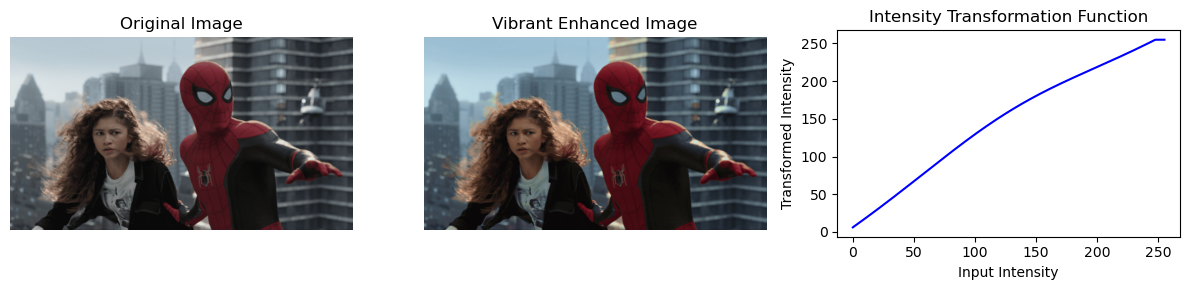

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Read the input image
input_image = cv.imread('Input/spider.png')

# Convert the image to the HSV color space
hsv_image = cv.cvtColor(input_image, cv.COLOR_BGR2HSV)

# Split the image into hue, saturation, and value planes
saturation_plane = hsv_image[:, :, 1]

# Define the intensity transformation parameters
a = 0.25
sigma = 70

# Define the intensity transformation function
def intensity_transformation(x):
    return (np.minimum(x + a * 128 * np.exp(-(x - 128)**2 / (2 * sigma**2)), 255))

# Apply the intensity transformation to the saturation plane
intensity_transformed_saturation = intensity_transformation(saturation_plane)

# Update the saturation plane in the HSV image
hsv_image[:, :, 1] = intensity_transformed_saturation

# Convert the HSV image back to the BGR color space
transformed_image = cv.cvtColor(hsv_image, cv.COLOR_HSV2BGR)

# Create a meshgrid for plotting
x = np.arange(0, 256)
y = np.arange(0, 256)
X, Y = np.meshgrid(x, y)

# Compute the intensity transformation for each pixel value
transformed_intensities = intensity_transformation(X)

# Plot the intensity transformation function
plt.figure(figsize=(12, 3))

plt.subplot(1, 3, 1)
plt.imshow(cv.cvtColor(input_image, cv.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(cv.cvtColor(transformed_image, cv.COLOR_BGR2RGB))
plt.title('Vibrant Enhanced Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.plot(x, intensity_transformation(x),color='blue')
plt.title('Intensity Transformation Function')
plt.xlabel('Input Intensity')
plt.ylabel('Transformed Intensity')

plt.tight_layout()
plt.savefig('Output/after_enhancing_vibrance_Q4.png')
plt.show()